In [2]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

In [3]:
train = kunfu.read_csv('train_1.csv').fillna(0)
print(train.head())

                                                Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         0.0         0.0   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-09  ...  2016-12-22  2016-12-23  2016-12-24  

In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145063 entries, 0 to 145062
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 609.8+ MB
None


In [5]:
# Using Counters 
# dictionary keys and their counts are stored as dictionary values
# in a sorted manner as per value

# Reason why we are taking 'en' as a root language to focus on
def lang(Page):
    val = re.search('[a-z][a-z].wikipedia.org',Page)
    if val:
        return val[0][0:2]           
    
    # no_lang for media files ; wikimedia.org
    return 'no_lang'

train['language'] = train.Page.map(lang)

# Article Count 
print("\nArticle count as per Language : \n", Counter(train.language))


Article count as per Language : 
 Counter({'en': 24108, 'ja': 20431, 'de': 18547, 'no_lang': 17855, 'fr': 17802, 'zh': 17229, 'ru': 15022, 'es': 14069})


In [6]:
language_set = {}
language_set['en'] = train[train.language=='en'].iloc[:,0:-1]
language_set['ja'] = train[train.language == 'ja'].iloc[:, 0:-1]
language_set['de'] = train[train.language == 'de'].iloc[:, 0:-1]
language_set['fr'] = train[train.language == 'fr'].iloc[:, 0:-1]
language_set['ru'] = train[train.language == 'ru'].iloc[:, 0:-1]
language_set['es'] = train[train.language == 'es'].iloc[:, 0:-1]
language_set['no_lang'] = train[train.language == 'no_lang'].iloc[:, 0:-1]

for key in language_set:
    print("KEY : ", language_set[key],"\n")

KEY :                                                       Page  2015-07-01  \
8357            !vote_en.wikipedia.org_desktop_all-agents         3.0   
8358    "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...         0.0   
8359    "European_Society_for_Clinical_Investigation"_...         0.0   
8360    "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...      2403.0   
8361       100_metres_en.wikipedia.org_desktop_all-agents       982.0   
...                                                   ...         ...   
113946  Zikanyrops_sparsa_en.wikipedia.org_all-access_...         1.0   
113947  Zillur_Rahman_John_en.wikipedia.org_all-access...         7.0   
113948   Zitadelle_en.wikipedia.org_all-access_all-agents        10.0   
113949  Zovashen_(Dzhannatlu),_Ararat_en.wikipedia.org...         0.0   
113950  Zurich.minds_en.wikipedia.org_all-access_all-a...         8.0   

        2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
8357           4.0         7.0         4.0    

In [7]:
# axis =0 : vertical in NumPy ;   axis =1 : horizontal in NumPy
total_view = {} 
for key in language_set:
    total_view[key] = language_set[key].iloc[:, 1:].sum(axis=0) / language_set[key].shape[0]


for key in language_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    3513.862203
2015-07-02    3502.511407
2015-07-03    3325.357889
2015-07-04    3462.054256
2015-07-05    3575.520035
                 ...     
2016-12-27    6040.680728
2016-12-28    5860.227559
2016-12-29    6245.127510
2016-12-30    5201.783018
2016-12-31    5127.916418
Length: 550, dtype: float64
KEY :  ja

Total_Value KEY : 
 2015-07-01     580.647056
2015-07-02     666.672801
2015-07-03     602.289805
2015-07-04     756.509177
2015-07-05     725.720914
                 ...     
2016-12-27     789.158680
2016-12-28     790.500465
2016-12-29     865.483236
2016-12-30     952.018354
2016-12-31    1197.239440
Length: 550, dtype: float64
KEY :  de

Total_Value KEY : 
 2015-07-01     714.968405
2015-07-02     705.229741
2015-07-03     676.877231
2015-07-04     621.145145
2015-07-05     722.076185
                 ...     
2016-12-27    1085.095379
2016-12-28    1032.640804
2016-12-29     994.657141
2016-12-30     949.265649
2016-12-31     893.

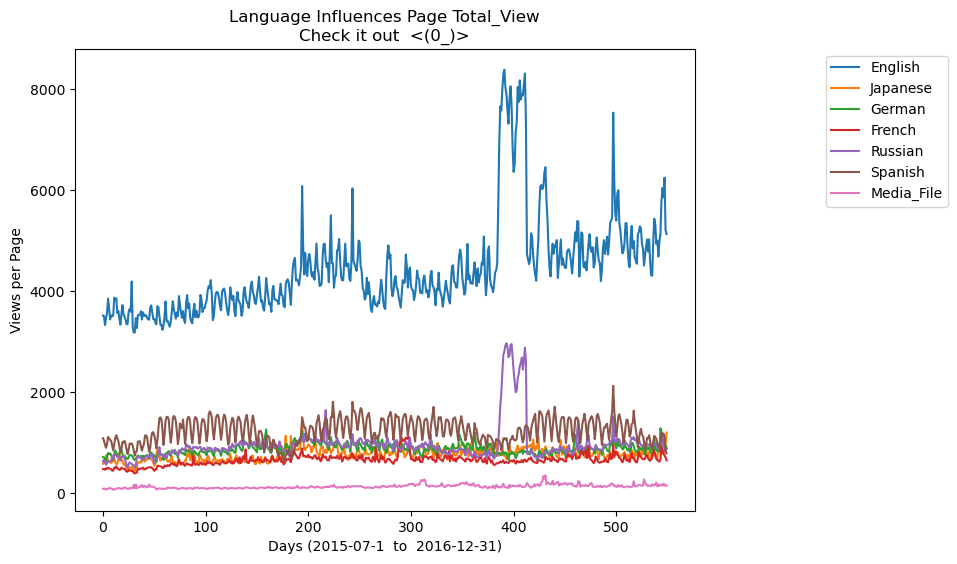

In [8]:
# Still not clear
days = [r
        for r in range(total_view['en'].shape[0])]

# height and width of graph
plot.figure(figsize=(8, 6))
labels={'ja':'Japanese','de':'German','en' : 'English','no_lang':'Media_File','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'}

for key in total_view:
    plot.plot(days,total_view[key],label = labels[key])
    

plot.ylabel('Views per Page')
plot.xlabel('Days (2015-07-1  to  2016-12-31)')
plot.title('Language Influences Page Total_View\nCheck it out  <(0_)>')
plot.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plot.show()

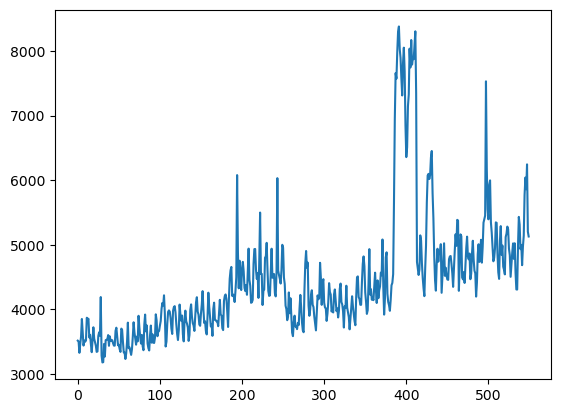

In [9]:
plot.plot(days,total_view['en'],label=labels['en'])
plot.show()

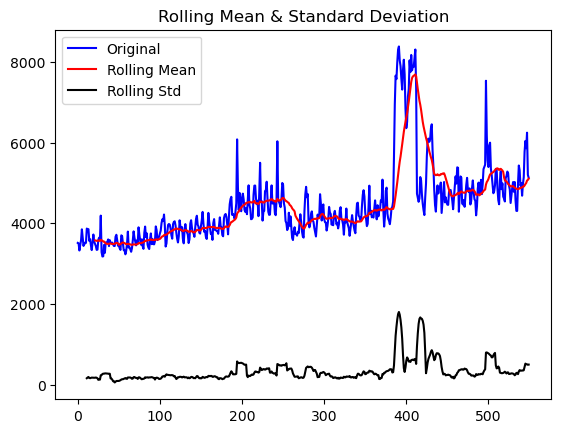

ADF Stastistic: -2.247284
p-value: 0.189534
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [10]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x.values, color='blue',label='Original')
    mean = plot.plot(rolmean.values, color='red', label='Rolling Mean')
    std = plot.plot(rolstd.values, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
test_stationarity(total_view['en'])

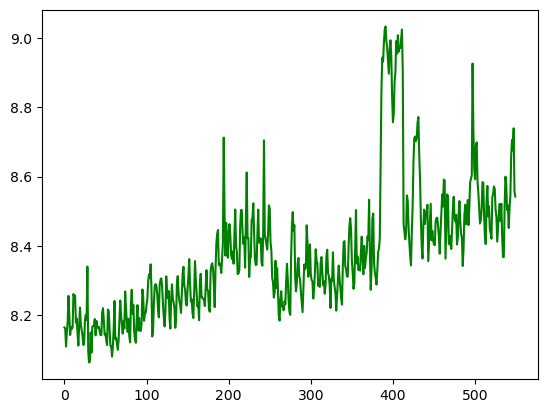

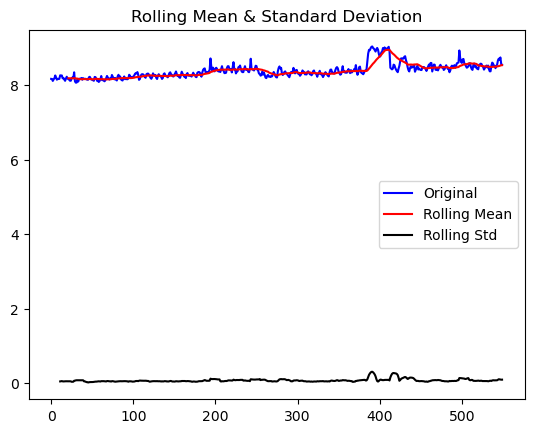

ADF Stastistic: -2.032439
p-value: 0.272533
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [11]:
ts_log = dragon.log(total_view['en'])
plot.plot(ts_log.values,color="green")
plot.show()

test_stationarity(ts_log)

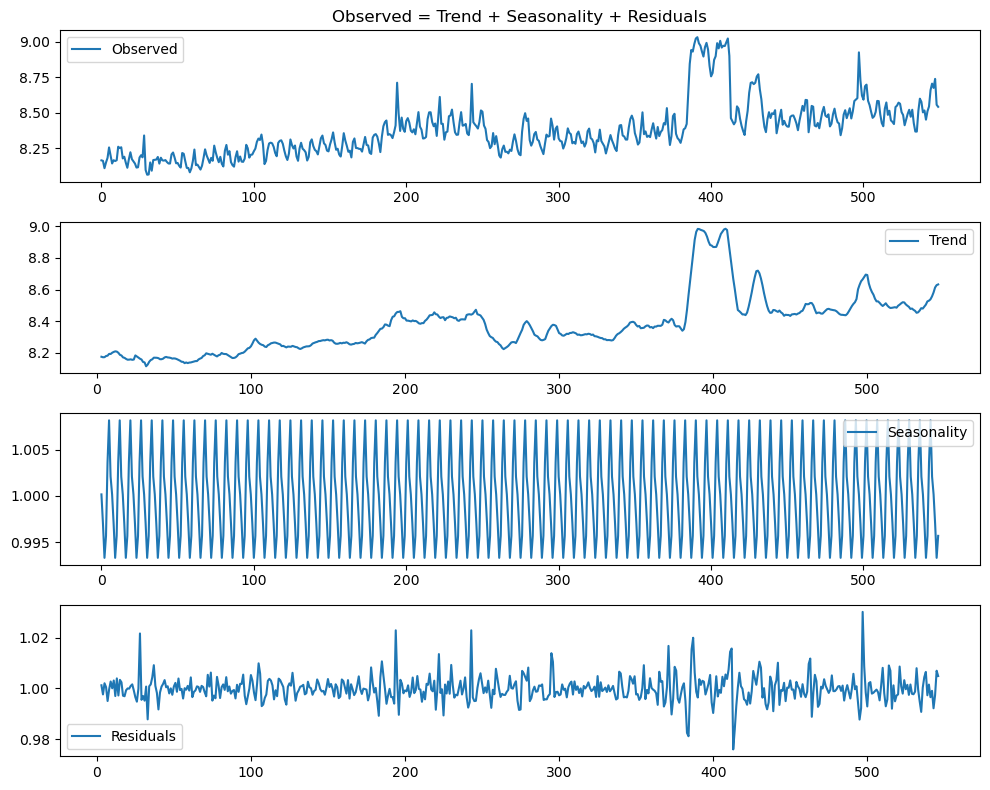

In [12]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming ts_log is your time series data in log-transformed form
# Use period instead of freq (freq is deprecated)
decomposition = seasonal_decompose(ts_log.values, model='multiplicative', period=7)

# Extract trend, seasonal, and residual components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposition components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.title('Observed = Trend + Seasonality + Residuals')
plt.plot(ts_log.values, label='Observed')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [13]:
ts_log_decompose = residual
#ts_log_decompose.fillna(inplace=True)
#test_stationarity(ts_log_decompose)

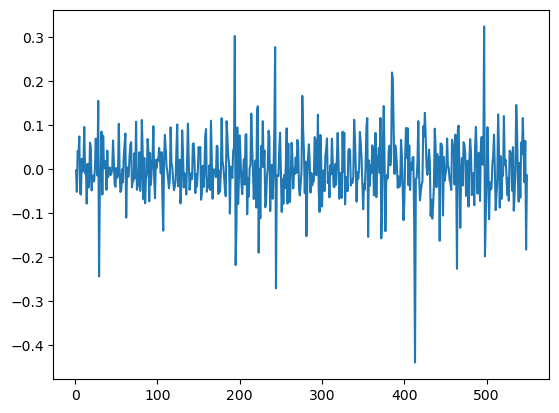

In [14]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff.values)
plot.show()

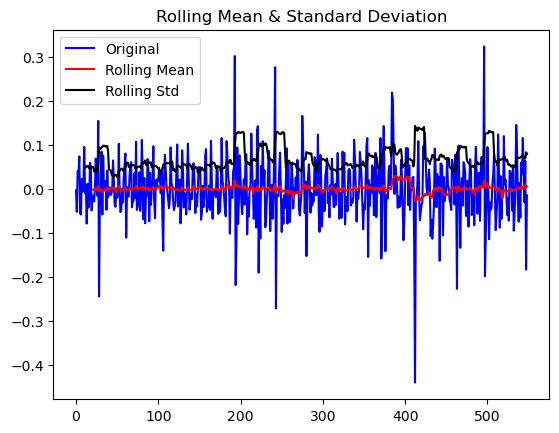

ADF Stastistic: -8.154260
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [15]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

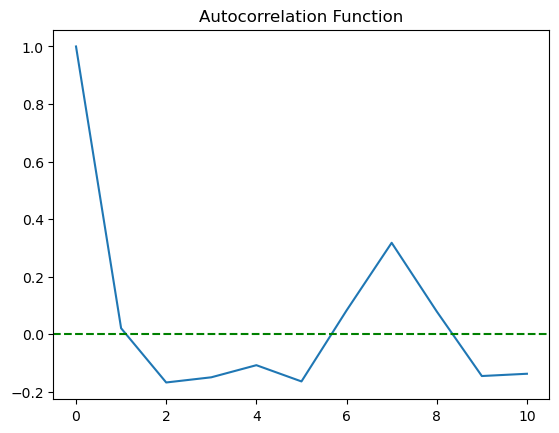

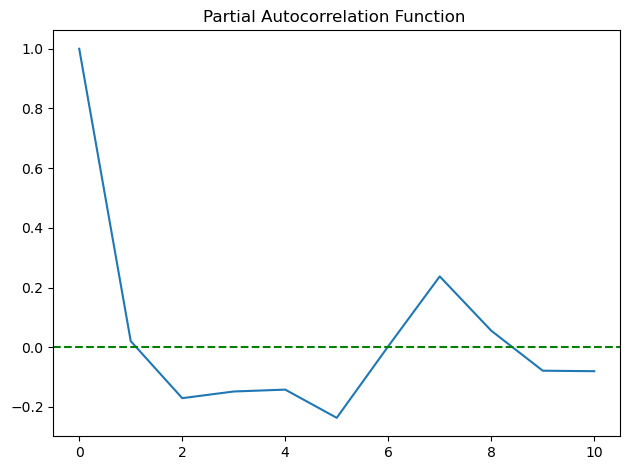

In [16]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

lag_acf = acf(ts_log_diff, nlags=10)
lag_pacf = pacf(ts_log_diff, nlags=10, method='ols')

#Plot ACF: 
plot.subplot(1,1,1)

plot.plot(lag_acf)
#print(lag_acf[0.5])

plot.axhline(y=0,linestyle='--',color='g')
plot.title('Autocorrelation Function')
plot.show()

#Plot PACF:
plot.subplot(1,1,1)
plot.plot(lag_pacf)

plot.axhline(y=0,linestyle='--',color='green')
plot.title('Partial Autocorrelation Function ')
plot.tight_layout()
plot.show()

ValueError: operands could not be broadcast together with shapes (550,) (549,) 

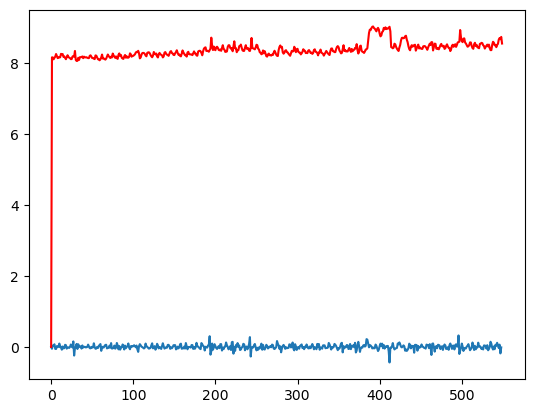

In [18]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plot

# Fit the ARIMA model using the updated module
model = ARIMA(ts_log.values, order=(1, 1, 0))  
results_ARIMA = model.fit()

# Plot the original differenced log data
plot.plot(ts_log_diff.values, label='Original Data')

# Plot the fitted values from the ARIMA model
plot.plot(results_ARIMA.fittedvalues, color='red', label='Fitted Values')

# Add title showing RSS (Residual Sum of Squares)
rss = sum((results_ARIMA.fittedvalues - ts_log_diff.values)**2)
plot.title(f'RSS: {rss:.7f}')

# Show the plot
plot.legend()
plot.show()


In [19]:
from statsmodels.tsa.arima_model import ARIMA
from pandas import DataFrame
print(results_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  550
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 683.940
Date:                Sun, 20 Oct 2024   AIC                          -1363.881
Time:                        17:21:33   BIC                          -1355.264
Sample:                             0   HQIC                         -1360.513
                                - 550                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0205      0.028      0.737      0.461      -0.034       0.075
sigma2         0.0048      0.000     30.595      0.000       0.005       0.005
Ljung-Box (L1) (Q):                   0.01   Jarque-

In [21]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

size = int(len(ts_log) - 100)
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...\n')

for t in range(len(test_arima)):
    model = ARIMA(history, order=(1, 1, 1))  # Updated import used
    model_fit = model.fit()  # 'disp' removed in new implementation
    
    output = model_fit.forecast()  # Forecasting the next point
    pred_value = output[0]  # Extracting predicted value

    original_value = test_arima[t]  # Getting the actual value
    history.append(original_value)  # Updating history with actual value
    
    # Convert the log-transformed values back to the original scale using np.exp
    pred_value = np.exp(pred_value)
    original_value = np.exp(original_value)
    
    # Calculate the error percentage
    error = (abs(pred_value - original_value) / original_value) * 100
    error_list.append(error)
    
    # Print predicted, expected values, and error percentage
    print(f'predicted = {pred_value:.6f},   expected = {original_value:.6f},   error = {error:.6f} %')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))

# Print mean error percentage
print(f'\n Mean Error in Predicting Test Case Articles: {sum(error_list) / float(len(error_list)):.6f} %')


Printing Predicted vs Expected Values...



C:\Users\hp\AppData\Local\Temp\ipykernel_5060\352180639.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  original_value = test_arima[t]  # Getting the actual value


predicted = 4582.569805,   expected = 4461.695661,   error = 2.709153 %
predicted = 4526.629776,   expected = 4456.174589,   error = 1.581069 %
predicted = 4516.800160,   expected = 4775.697611,   error = 5.421144 %
predicted = 4799.497409,   expected = 4818.150572,   error = 0.387144 %
predicted = 4835.873410,   expected = 4824.929940,   error = 0.226811 %
predicted = 4840.593278,   expected = 4704.449021,   error = 2.893947 %
predicted = 4731.594603,   expected = 4559.138958,   error = 3.782636 %
predicted = 4599.718197,   expected = 4347.536502,   error = 5.800565 %
predicted = 4407.437470,   expected = 4645.420275,   error = 5.122955 %
predicted = 4668.755575,   expected = 4904.789282,   error = 4.812311 %
predicted = 4897.737186,   expected = 5161.465903,   error = 5.109570 %
predicted = 5126.723835,   expected = 4982.463373,   error = 2.895364 %
predicted = 4969.864479,   expected = 5385.581882,   error = 7.719081 %
predicted = 5328.034818,   expected = 5375.034802,   error = 0.8

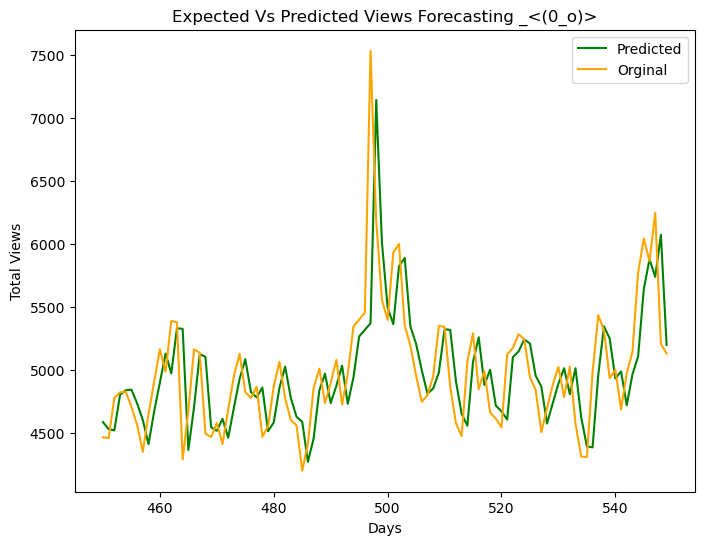

In [22]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

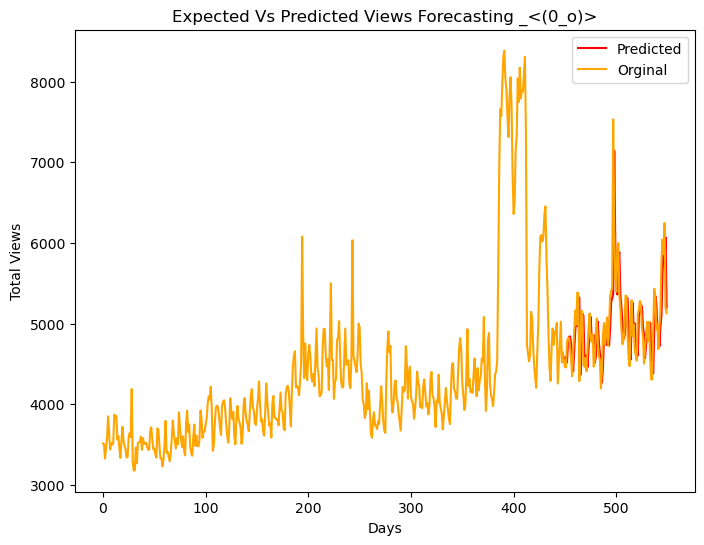

In [23]:
plot.figure(figsize=(8, 6))
test_day = [t+450
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'red')
plot.plot(days, total_view['en'], color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting _<(0_o)>')
plot.xlabel('Days')
plot.ylabel('Total Views')
plot.legend(labels)
plot.show()

In [ ]:
npages = 5
top_pages = {}
key = 'en'
print(key)
sum_set = kunfu.DataFrame(language_set[key][['Page']])
sum_set['total'] = language_set[key].sum(axis=1)
sum_set = sum_set.sort_values('total',ascending=False)
print(sum_set.head(5))
top_pages[key] = sum_set.index[0]
print('\n')

en
